<a href="https://colab.research.google.com/github/maktaurus/ML-Work/blob/main/Classic_Algorithams/Decision_Tree_and__Random_Forest_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree:
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

1) Does not require preprocessing and can work with numerical and categorical data.

2) Does not require scaling standardizing, normalization or training on minibatches.

3) Perform well on large datasets.

**Classification problem on iris datasets**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

Import data

In [ ]:
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [ ]:
x, y = iris.data, iris.target

In [ ]:
x.shape

(150, 4)

Create decision tree

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x,y)

DecisionTreeClassifier()

In [ ]:
clf.predict([[6.1,2.7,3.9,1.2]])

array([1])

Visualize the tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'), Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), Text(0.46153846153846156, 0.8333333333333333, 'True  '), Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'), Text(0.5384615384615384, 0.8333333333333333, '  False'), Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'), Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'), Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'), Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'), Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(0.5384615384615384, 0.25, 'x[2] <= 5.4

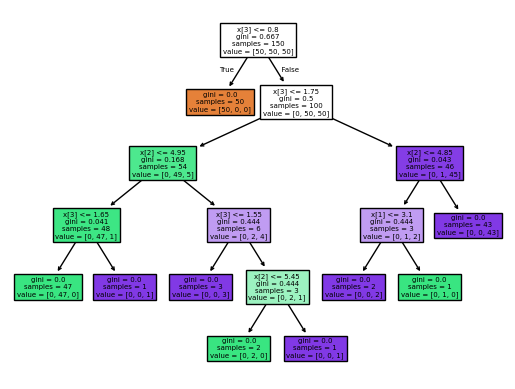

In [ ]:
print(plot_tree(clf,filled=True))

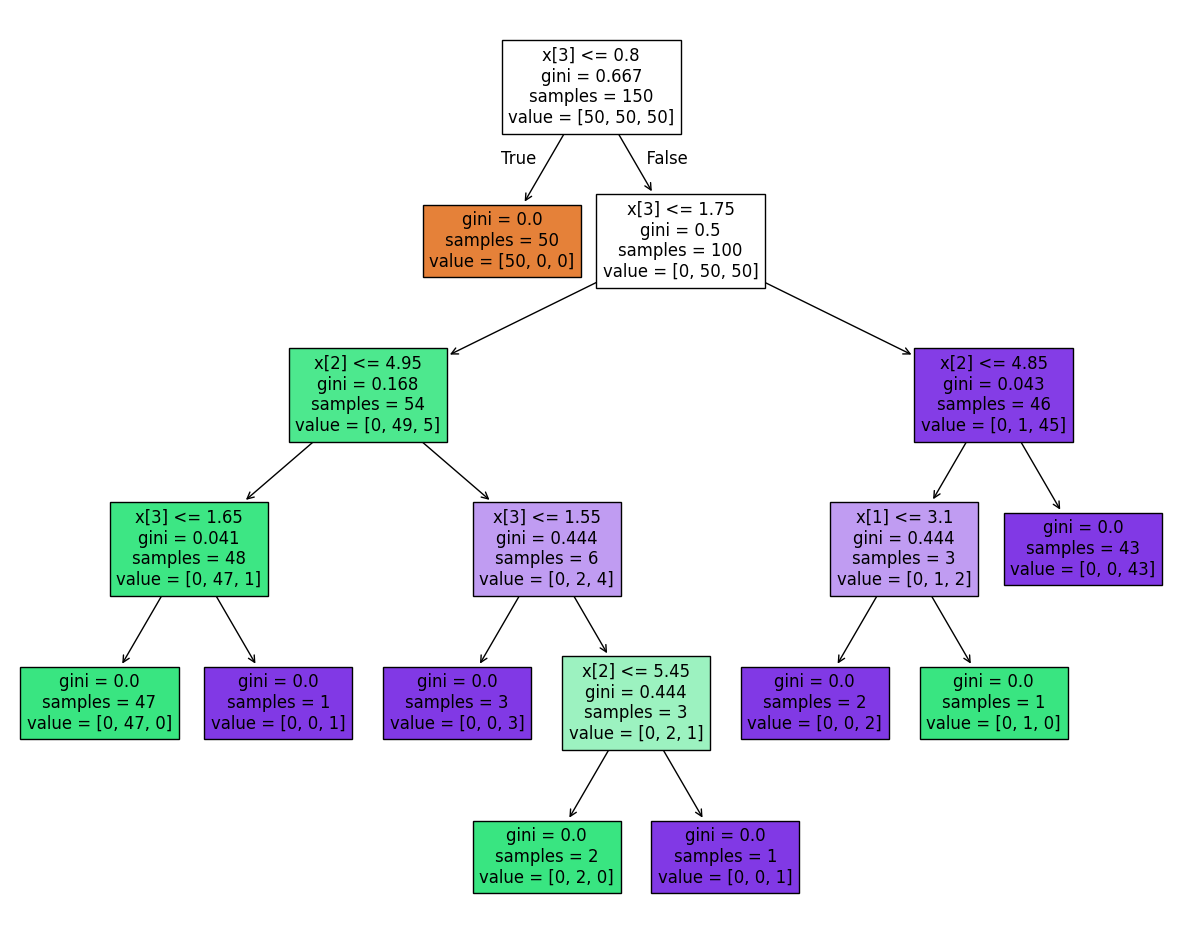

In [ ]:
plt.figure(figsize=(15,12))
plot_tree(clf,filled=True)
plt.show()

**Pruning :** is used when model is overfitting. The model performs well on trainning data and but fails on test data.
Pruning is a technique that removes the parts of the Decision Tree which prevent it from growing to its full depth.

In Sklearn use ccp_alpha in the range 0 to 1. Where 0 is minimum and maximum 1.

# Random Forest
Random Forest is a popular supervised learning algorithm in Machine Learning (ML) that combines multiple decision trees to improve the accuracy and robustness of predictions.

Random Forest is an ensemble learning method that constructs multiple decision trees during training. Each decision tree is trained on a random subset of features and a random subset of training data. The output prediction is made by combining the predictions from all decision trees.

**Key Components:**

**Decision Trees:** Each decision tree is a binary tree where each internal node represents a feature, and each leaf node represents a class label or a regression value.

**Random Feature Selection:** At each node, a random subset of features is selected to consider for splitting.

**Random Data Sampling:** Each decision tree is trained on a random subset of training data (with replacement).

**Voting:** The final prediction is made by combining the predictions from all decision trees (for classification) or averaging the predictions (for regression).

**Hyperparameters:**

**n_estimators**: Number of decision trees.

**max_depth:** Maximum depth of each decision tree.

**min_samples_split:** Minimum samples required to split an internal node.

**min_samples_leaf:** Minimum samples required to be at a leaf node.

**max_features:** Maximum number of features to consider at each split.

**Common Applications:**

Classification: Image classification, text classification, sentiment analysis.

Regression: Predicting continuous outcomes, such as stock prices or energy consumption.

Feature Selection: Identifying important features in high-dimensional data.

In [2]:
pip install -q pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 31.4 MB/s eta 0:00:00


In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pytorch_lightning as pl

In [43]:
data = pd.read_csv("/content/Census_income_train.csv")
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Preprocess the Data

In [44]:
len(data)

32560

In [45]:
data.dropna(inplace=True)

In [46]:
data["Income"] = np.where(data["Income"].str.contains("<=50K"),0,1)

In [47]:
data["Income"].value_counts()

,count
Income,
0,24719
1,7841


In [48]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-num   32560 non-null  int64 
 5   Marital status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital-gain    32560 non-null  int64 
 11  Capital-loss    32560 non-null  int64 
 12  Hours-per-week  32560 non-null  int64 
 13  Native-country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [50]:
cat_columns = []
for col in data.columns:
  if data[col].dtype == "object":
    cat_columns.append(col)
cat_columns

['Workclass',
 'Education',
 'Marital status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country']

In [52]:
le = OrdinalEncoder()
data[cat_columns] = le.fit_transform(data[cat_columns])

In [53]:
scaler_columns = ["Age","fnlwgt","Education-num","Capital-gain","Capital-loss","Hours-per-week"]
scaler = StandardScaler()
data[scaler_columns] = scaler.fit_transform(data[scaler_columns])


In [54]:
data

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,0.030655,7.0,-1.063680,9.0,1.134720,4.0,1.0,1.0,4.0,1.0,0.148446,-0.216587,-0.035430,38.0,0
1,0.837084,6.0,-1.008775,9.0,1.134720,2.0,4.0,0.0,4.0,1.0,-0.145923,-0.216587,-2.222120,38.0,0
2,-0.042656,4.0,0.245036,11.0,-0.420054,0.0,6.0,1.0,4.0,1.0,-0.145923,-0.216587,-0.035430,38.0,0
3,1.057019,4.0,0.425763,1.0,-1.197441,2.0,6.0,0.0,2.0,1.0,-0.145923,-0.216587,-0.035430,38.0,0
4,-0.775774,4.0,1.408158,9.0,1.134720,2.0,10.0,5.0,2.0,0.0,-0.145923,-0.216587,-0.035430,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849085,4.0,0.639707,7.0,0.746027,2.0,13.0,5.0,4.0,0.0,-0.145923,-0.216587,-0.197407,38.0,0
32556,0.103967,4.0,-0.335487,11.0,-0.420054,2.0,7.0,0.0,4.0,1.0,-0.145923,-0.216587,-0.035430,38.0,1
32557,1.423578,4.0,-0.358832,11.0,-0.420054,6.0,1.0,4.0,4.0,0.0,-0.145923,-0.216587,-0.035430,38.0,0
32558,-1.215644,4.0,0.110915,11.0,-0.420054,4.0,1.0,3.0,4.0,1.0,-0.145923,-0.216587,-1.655200,38.0,0


**Split the data into train_test**

In [55]:
x = data.drop("Income",axis=1)
y = data["Income"]

In [56]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

**Create a Random classifier instance and train**

In [57]:
clf = RandomForestClassifier(verbose=1)

In [58]:
clf.fit(train_x,train_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s


RandomForestClassifier(verbose=1)

**Get validation score**

In [59]:
clf.score(test_x,test_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


0.8619471744471745

In [62]:
clf.predict(test_x[:20])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

Create instance of decision tree classifier and train and check the score.

The random forest performed well on data

In [66]:
de_clf = DecisionTreeClassifier()
de_clf.fit(train_x,train_y)

DecisionTreeClassifier()

In [67]:
de_clf.score(test_x,test_y)

0.816492628992629

# Pytorch training

Get a new set of data

In [68]:
!wget 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'

--2024-10-05 11:07:36--  http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1668792 (1.6M) [application/zip]
Saving to: ‘petfinder-mini.zip’

petfinder-mini.zip  100%[===================>]   1.59M  --.-KB/s    in 0.009s  

2024-10-05 11:07:36 (182 MB/s) - ‘petfinder-mini.zip’ saved [1668792/1668792]



In [69]:
!unzip /content/petfinder-mini.zip

Archive:  /content/petfinder-mini.zip
   creating: petfinder-mini/
  inflating: petfinder-mini/README.md  
  inflating: __MACOSX/petfinder-mini/._README.md  
  inflating: petfinder-mini/petfinder-mini.csv  
  inflating: __MACOSX/petfinder-mini/._petfinder-mini.csv  


In [70]:
pet_data = pd.read_csv("/content/petfinder-mini/petfinder-mini.csv")
pet_data.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


In [71]:
pet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [72]:
pet_data.isnull().sum()

,0
Type,0
Age,0
Breed1,0
Gender,0
Color1,0
Color2,0
MaturitySize,0
FurLength,0
Vaccinated,0
Sterilized,0


**Convert the categorical data into integers with sklean OrdinalEncoder()**

In [74]:
categorical_cols = ['Type', 'Breed1', 'Gender', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health']
oe = OrdinalEncoder()
pet_data[categorical_cols] = oe.fit_transform(pet_data[categorical_cols])

**Normalize the interger data**

In [75]:
numerical_cols = ['Age', 'Fee', 'PhotoAmt']
scaler = StandardScaler()
pet_data[numerical_cols] = scaler.fit_transform(pet_data[numerical_cols])

**Drop the uncessary Description column from dataset**

In [82]:
pet_data.drop("Description",axis=1,inplace=True)

In [83]:
pet_data

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,AdoptionSpeed
0,0.0,-0.452479,147.0,1.0,0.0,5.0,2.0,2.0,0.0,0.0,0.0,0.950288,-0.829762,1
1,0.0,-0.555981,54.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-0.299388,-0.511871,1
2,1.0,-0.555981,99.0,1.0,1.0,5.0,1.0,1.0,2.0,0.0,0.0,-0.299388,1.077583,1
3,1.0,-0.400729,99.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.575125,1.395473,1
4,1.0,-0.555981,99.0,1.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,-0.299388,-0.193980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,1.0,0.634287,115.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.299388,-1.147652,0
11533,0.0,-0.555981,55.0,0.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,-0.299388,-0.829762,1
11534,1.0,-0.297227,126.0,0.0,0.0,5.0,2.0,0.0,2.0,0.0,0.0,-0.299388,-0.829762,1
11535,0.0,-0.141975,55.0,0.0,6.0,5.0,2.0,2.0,2.0,2.0,0.0,-0.299388,-0.193980,0


In orginal dataset target columns AdoptionSpeed specify the speed at which a pet will be adopted (e.g. in the first week, the first month, the first three months, and so on).

In this example we will transform the column wheter the pet was adopted or not by coverting it to binary classification problem.

In [79]:
pet_data["AdoptionSpeed"] = np.where(pet_data["AdoptionSpeed"] == 4,0,1)

In [84]:
pet_data["AdoptionSpeed"].value_counts()

,count
AdoptionSpeed,
1,8457
0,3080


**Define custom dataset class.**

In [86]:
class MyDataset(torch.utils.data.Dataset):
  def __init__(self,data):
    super().__init__()
    self.x = data.drop("AdoptionSpeed",axis=1).values
    self.y = data["AdoptionSpeed"].values

  def __len__(self):
    return len(self.x)

  def __getitem__(self,idx):
    return torch.tensor(self.x[idx],dtype=torch.float32),torch.tensor(self.y[idx],dtype=torch.float32)

df = MyDataset(pet_data)

In [87]:
for x in df:
  print(x)
  break

(tensor([  0.0000,  -0.4525, 147.0000,   1.0000,   0.0000,   5.0000,   2.0000,
          2.0000,   0.0000,   0.0000,   0.0000,   0.9503,  -0.8298]), tensor(1.))


In [88]:
len(df)

11537

**Split the data into train and validation set.**

In [89]:
train,val = torch.utils.data.random_split(df,[10000,1537])

In [102]:
val,test = torch.utils.data.random_split(val,[768,769])

In [103]:
train_df = torch.utils.data.DataLoader(train,batch_size=32,shuffle=True,generator=torch.Generator().manual_seed(42))
val_df = torch.utils.data.DataLoader(val,batch_size=32)

**Check for dtype and shape of data**

In [91]:
for x in train_df:
  print(x[0].dtype)
  print(x[1].dtype)
  print(x[0].shape)
  print(x[1].shape)
  print(x[1])
  break

torch.float32
torch.float32
torch.Size([32, 13])
torch.Size([32])
tensor([0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.])


In [92]:
for x in val_df:
  print(x[0].dtype)
  print(x[1].dtype)
  print(x[0].shape)
  print(x[1].shape)
  print(x[1])
  break

torch.float32
torch.float32
torch.Size([32, 13])
torch.Size([32])
tensor([0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])


**Create a pytorch model class**

In [104]:
class MyModule(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(13,128)
    self.fc2 = torch.nn.Linear(128,256)
    self.fc3 = torch.nn.Linear(256,512)
    self.fc4 = torch.nn.Linear(512,256)
    self.fc5 = torch.nn.Linear(256,1)
    self.relu = torch.nn.ReLU()

  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.relu(self.fc4(x))
    x = self.fc5(x)
    return x

model = MyModule()

Create a ligtning module instance and define the training and validation step and configure optimizer

In [105]:
class Lightningmodule(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = MyModule()
    self.loss = torch.nn.BCELoss()
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self,x):
    return self.model(x)

  def training_step(self,batch,batch_idx):
    x,y = batch
    y_hat = self.model(x)
    loss = self.loss(self.sigmoid(y_hat),y.unsqueeze(1))
    self.log("train_loss",loss,prog_bar=True)
    return loss

  def validation_step(self,batch,batch_idx):
    x,y = batch
    y_hat = self.model(x)
    loss = self.loss(self.sigmoid(y_hat),y.unsqueeze(1))
    self.log("val_loss",loss,prog_bar=True)
    return loss

  def configure_optimizers(self):
    return torch.optim.Adam(self.model.parameters(),lr=0.001)

lightmodel = Lightningmodule()

**Create a trainer instance and train the model on dataset**

In [112]:
checkpoint = pl.callbacks.ModelCheckpoint(monitor="train_loss",mode="min")


In [113]:
trainer = pl.Trainer(max_epochs=5,callbacks=[checkpoint])
trainer.fit(lightmodel,train_df,val_df)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type     | Params | Mode 
---------------------------------------------
0 | model   | MyModule | 297 K  | train
1 | loss    | BCELoss  | 0      | train
2 | sigmoid | Sigmoid  | 0      | train
---------------------------------------------
297 K     Trainable params
0         Non-trainable params
297 K     Total params
1.192     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [114]:
checkpoint.best_model_path

'/content/lightning_logs/version_3/checkpoints/epoch=0-step=313.ckpt'

In [115]:
saved_model = Lightningmodule.load_from_checkpoint(checkpoint.best_model_path)

In [118]:
correct = 0
wrong = 0
for i,x in enumerate(val_df):
  if i == 3:
    break
  pred = saved_model(x[0])
  for x,y in zip(pred,x[1]):
    if x > 0.5:
      correct += 1
      print(1,int(y.detach().numpy()))
    else:
      print(0,int(y.detach().numpy()))
      wrong += 1


print(correct,wrong)

0 0
1 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
1 1
1 1
1 0
1 1
1 1
1 1
1 0
1 0
1 1
1 0
1 1
1 0
1 1
1 0
1 1
0 0
0 0
0 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
0 0
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 1
1 0
0 1
1 1
1 1
1 1
0 0
1 0
1 1
0 0
0 1
0 1
1 1
1 1
0 1
0 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 0
1 1
1 0
1 1
0 1
1 1
1 1
0 0
73 23


In [119]:
73/96

0.7604166666666666